# 💲📈 Stock Performance Analysis and Visualizations

# ---------------------------------------------------------------

# 🔟 Top 10 Green & Red Stocks

In [1]:
import os
import pandas as pd

stock_folder = '/Users/jagadeeshsaivennela/Documents/Data Analysis - mini projects/Data-Driven Stock Analysis Project/Project#2/stock_csvs'  # your folder with CSVs
returns = []

for file in os.listdir(stock_folder):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(stock_folder, file))
        df = df.sort_values(by='date')
        
        if df.empty or len(df) < 2:
            continue
        
        ticker = df['Ticker'].iloc[0]
        first_close = df['close'].iloc[0]
        last_close = df['close'].iloc[-1]
        
        yearly_return = (last_close - first_close) / first_close * 100
        returns.append({'Ticker': ticker, 'Yearly Return (%)': yearly_return})

returns_df = pd.DataFrame(returns)
top_10_green = returns_df.sort_values(by='Yearly Return (%)', ascending=False).head(10)
top_10_red = returns_df.sort_values(by='Yearly Return (%)').head(10)

print("✅ Top 10 Gainers:")
print(top_10_green)

print("\n❌ Top 10 Losers:")
print(top_10_red)


✅ Top 10 Gainers:
        Ticker  Yearly Return (%)
22       TRENT         223.092613
19         BEL         101.760057
49         M&M          95.976974
32  BAJAJ-AUTO          89.011153
0   BHARTIARTL          69.599049
35   POWERGRID          68.854924
37        BPCL          67.477150
30  HEROMOTOCO          58.976655
20   SUNPHARMA          57.282404
21     HCLTECH          53.257447

❌ Top 10 Losers:
        Ticker  Yearly Return (%)
46  INDUSINDBK         -30.458409
14  ASIANPAINT         -21.935046
48  BAJFINANCE         -16.110874
29    ADANIENT          -6.670856
40  HINDUNILVR          -0.957916
8    NESTLEIND           0.707141
24   KOTAKBANK           1.991836
47  BAJAJFINSV           2.549566
3        TITAN           3.518185
10      MARUTI           6.926712


# 📊 Bar Charts for Top 10 Green & Red Stocks

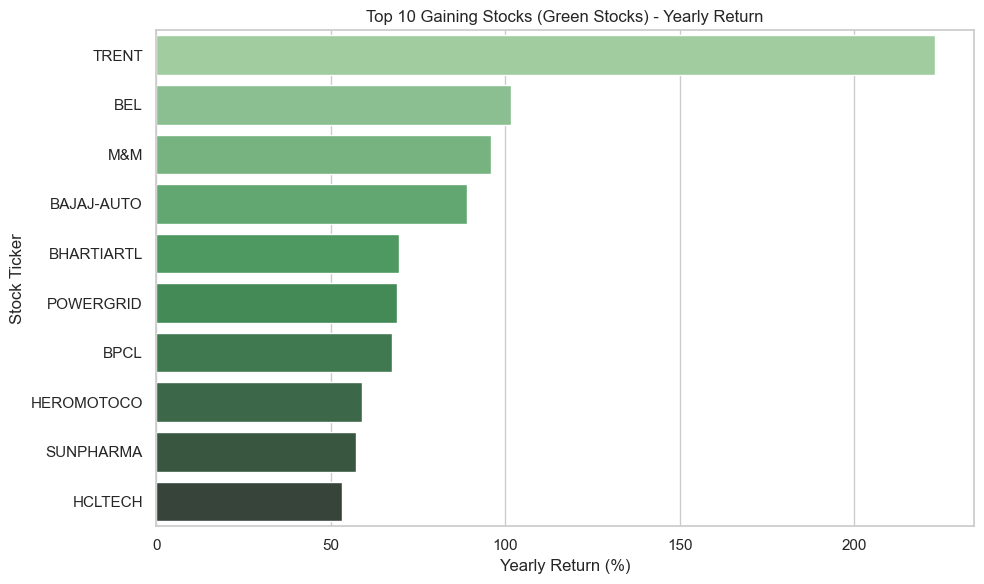

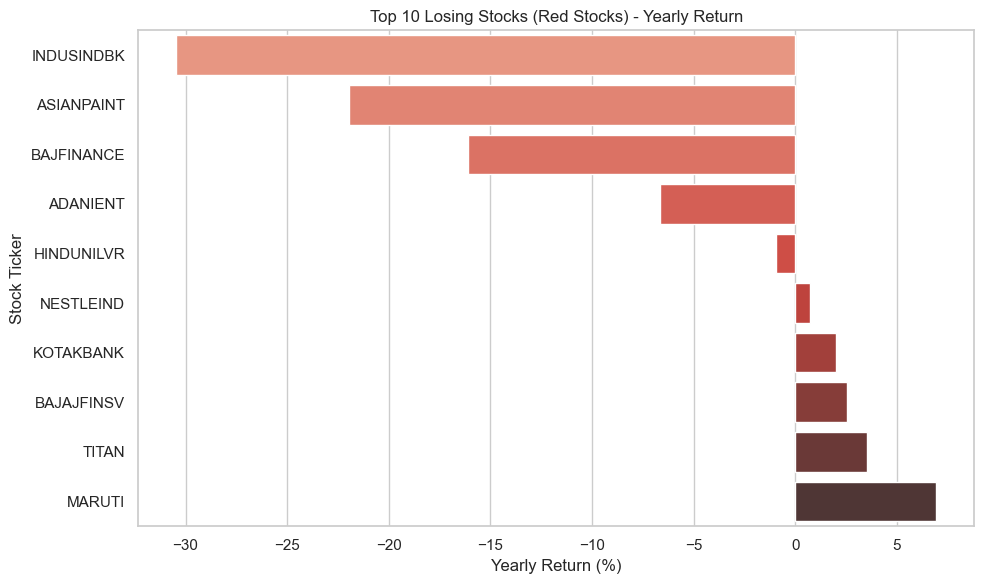

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# Set the visual style
sns.set(style="whitegrid")

# --- Top 10 Gainers ---
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_green, x='Yearly Return (%)', y='Ticker', palette='Greens_d')
plt.title("Top 10 Gaining Stocks (Green Stocks) - Yearly Return")
plt.xlabel("Yearly Return (%)")
plt.ylabel("Stock Ticker")
plt.tight_layout()
plt.show()

# --- Top 10 Losers ---
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_red, x='Yearly Return (%)', y='Ticker', palette='Reds_d')
plt.title("Top 10 Losing Stocks (Red Stocks) - Yearly Return")
plt.xlabel("Yearly Return (%)")
plt.ylabel("Stock Ticker")
plt.tight_layout()
plt.show()


# 🚀 Market Summary

In [5]:
import numpy as np

green_stocks = 0
red_stocks = 0
all_prices = []
all_volumes = []

for file in os.listdir(stock_folder):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(stock_folder, file))
        df = df.sort_values(by='date')

        if df.empty or len(df) < 2:
            continue

        # Get ticker
        ticker = df['Ticker'].iloc[0]
        
        # --- Green or Red stock check ---
        first_close = df['close'].iloc[0]
        last_close = df['close'].iloc[-1]
        if last_close > first_close:
            green_stocks += 1
        else:
            red_stocks += 1

        # --- Average price & volume ---
        avg_price = df[['open', 'high', 'low', 'close']].mean(axis=1)
        all_prices.extend(avg_price.tolist())
        all_volumes.extend(df['volume'].tolist())

# Overall averages
average_price = np.mean(all_prices)
average_volume = np.mean(all_volumes)

# --- Summary Output ---
print(f"✅ Green Stocks: {green_stocks}")
print(f"❌ Red Stocks: {red_stocks}")
print(f"📈 Average Stock Price: ₹{average_price:.2f}")
print(f"📊 Average Volume: {average_volume:.0f}")


✅ Green Stocks: 45
❌ Red Stocks: 5
📈 Average Stock Price: ₹2449.82
📊 Average Volume: 6833475


# Analysis:

# 1) 📈 Volatility Analysis

In [7]:
import pandas as pd
import os

stock_folder = '/Users/jagadeeshsaivennela/Documents/Data Analysis - mini projects/Data-Driven Stock Analysis Project/Project#2/stock_csvs'  # your CSV folder path

volatility_data = []

for file in os.listdir(stock_folder):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(stock_folder, file))
        df = df.sort_values(by='date')

        if df.empty or len(df) < 2:
            continue

        ticker = df['Ticker'].iloc[0]

        # Calculate daily return
        df['daily_return'] = df['close'].pct_change()

        # Calculate standard deviation of daily returns (volatility)
        volatility = df['daily_return'].std()

        if pd.notnull(volatility):
            volatility_data.append({'Ticker': ticker, 'Volatility': volatility})

# Create a DataFrame
vol_df = pd.DataFrame(volatility_data)

# Top 10 most volatile stocks
top_10_volatility = vol_df.sort_values(by='Volatility', ascending=False).head(10)
print(top_10_volatility)


        Ticker  Volatility
29    ADANIENT    0.028601
39  ADANIPORTS    0.026029
19         BEL    0.023283
22       TRENT    0.023074
15        ONGC    0.022247
37        BPCL    0.022069
2   SHRIRAMFIN    0.021687
6    COALINDIA    0.021411
36    HINDALCO    0.019587
13        NTPC    0.019475


# 📊 Visualization (Bar Chart)

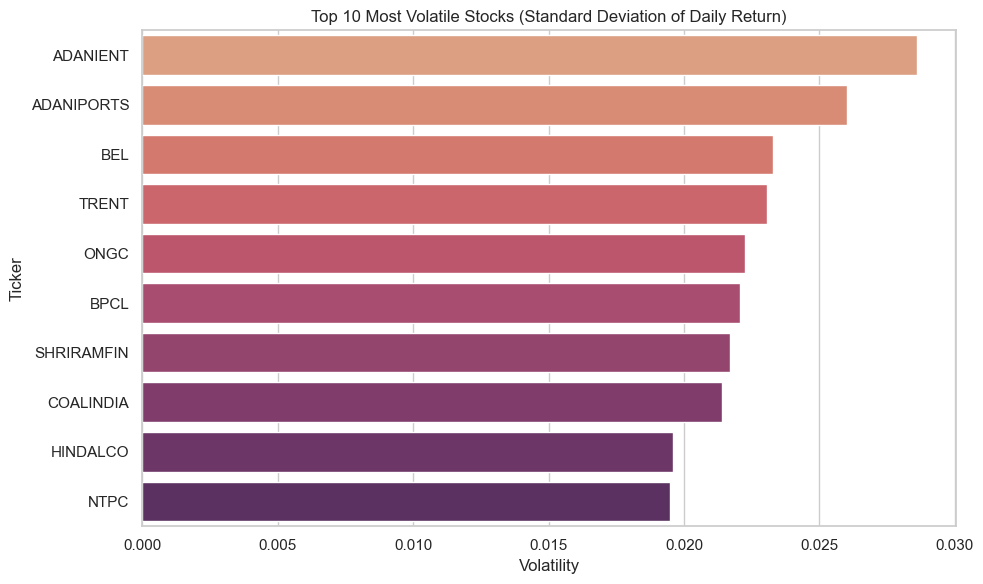

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_volatility, x='Volatility', y='Ticker', palette='flare')
plt.title("Top 10 Most Volatile Stocks (Standard Deviation of Daily Return)")
plt.xlabel("Volatility")
plt.ylabel("Ticker")
plt.tight_layout()
plt.show()


# 2) 📈 Cumulative Return Over Time 

In [9]:
top_5_tickers = top_10_green['Ticker'].tolist()  # From earlier top gainers step

cumulative_df = pd.DataFrame()

for ticker in top_5_tickers:
    file_path = os.path.join(stock_folder, f"{ticker}.csv")
    df = pd.read_csv(file_path)
    df = df.sort_values(by='date')

    if df.empty or len(df) < 2:
        continue

    df['daily_return'] = df['close'].pct_change()
    df['cumulative_return'] = (1 + df['daily_return']).cumprod()

    # Store only date and cumulative return for plotting
    cumulative_df[ticker] = df['cumulative_return'].values
    cumulative_df['date'] = df['date'].values

# Drop rows with any NaNs
cumulative_df.dropna(inplace=True)


# 📈 Cumulative Returns Plot

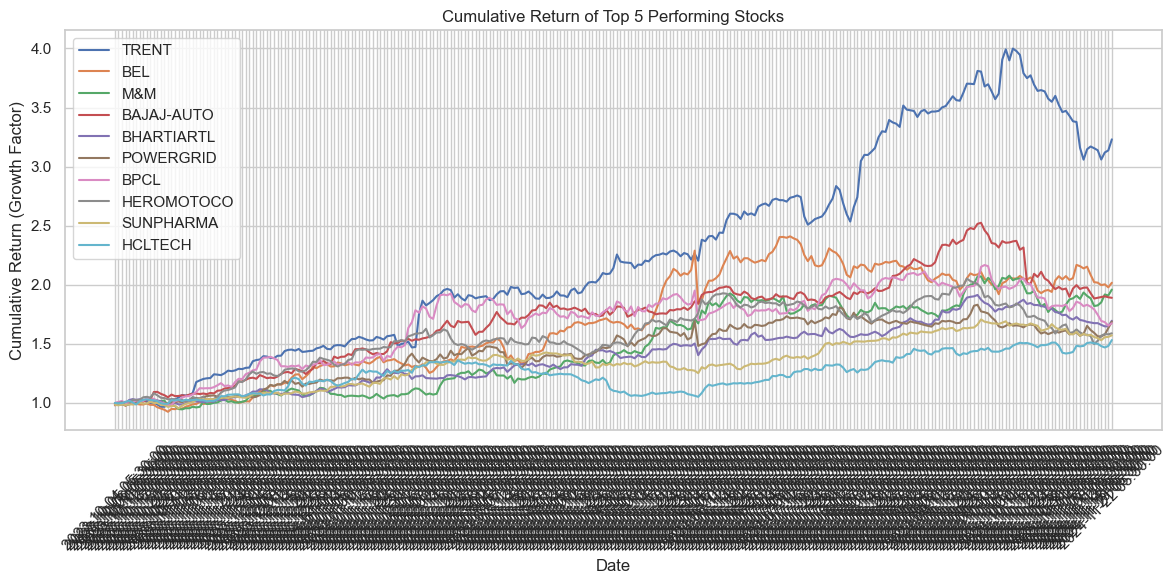

In [10]:
plt.figure(figsize=(12, 6))
for ticker in top_5_tickers:
    plt.plot(cumulative_df['date'], cumulative_df[ticker], label=ticker)

plt.title("Cumulative Return of Top 5 Performing Stocks")
plt.xlabel("Date")
plt.ylabel("Cumulative Return (Growth Factor)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 3) 🏢 Sector-wise Performance Analysis

In [16]:
import pandas as pd
import os

# Load sector mapping
sector_info = pd.read_csv("/Users/jagadeeshsaivennela/Downloads/Sector_data - Sheet1.csv")
# Adjust sector_map to use only the symbol as the key
sector_map = {symbol.split(": ")[-1]: sector for symbol, sector in zip(sector_info['Symbol'], sector_info['sector'])}

sector_returns = []

for file in os.listdir(stock_folder):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(stock_folder, file))
        df = df.sort_values(by='date')

        if df.empty or len(df) < 2:
            continue

        if ticker not in sector_map:
            continue  # skip unknown tickers
            continue  # skip unknown tickers

        sector = sector_map[ticker]
        first_close = df['close'].iloc[0]
        last_close = df['close'].iloc[-1]
        yearly_return = (last_close - first_close) / first_close * 100

        sector_returns.append({'Sector': sector, 'Return': yearly_return})

# Group by sector and compute average
sector_df = pd.DataFrame(sector_returns)
sector_avg_return = sector_df.groupby('Sector')['Return'].mean().reset_index()
sector_avg_return = sector_avg_return.sort_values(by='Return', ascending=False)


# 📊 Visualization: Sector Returns

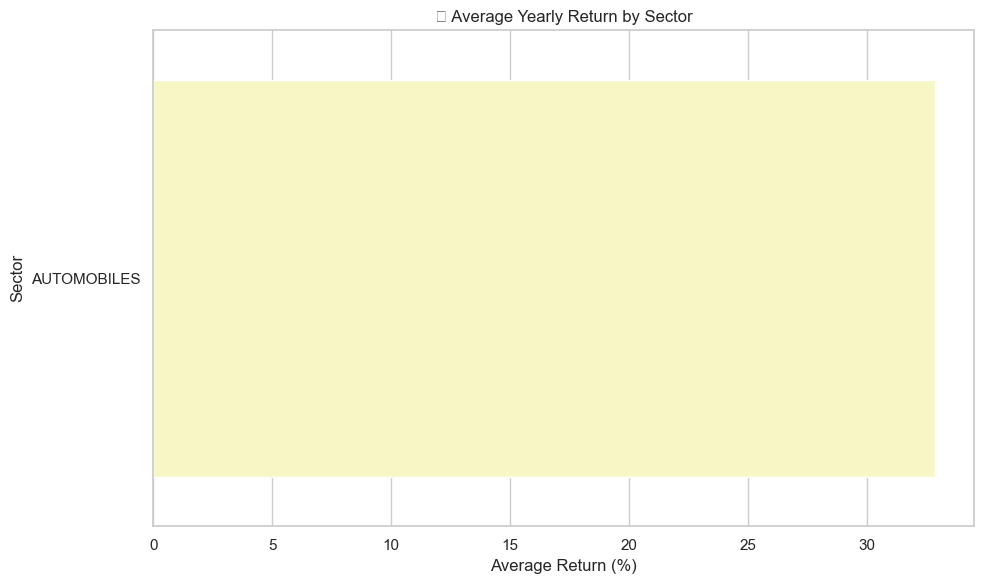

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", message="Glyph.*missing from font.*")


plt.figure(figsize=(10, 6))
sns.barplot(data=sector_avg_return, x='Return', y='Sector', palette='Spectral')
plt.title("📊 Average Yearly Return by Sector")
plt.xlabel("Average Return (%)")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()


# 4) 🔗 Stock Price Correlation Analysis

In [21]:
import pandas as pd
import os

price_df = pd.DataFrame()

for file in os.listdir(stock_folder):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(stock_folder, file))
        df = df[['date', 'close']].sort_values(by='date')
        ticker = os.path.splitext(file)[0]  # file name without .csv

        df.rename(columns={'close': ticker}, inplace=True)

        if price_df.empty:
            price_df = df
        else:
            price_df = pd.merge(price_df, df, on='date', how='outer')

# Set date as index and sort
price_df['date'] = pd.to_datetime(price_df['date'])
price_df = price_df.sort_values(by='date')
price_df.set_index('date', inplace=True)

# Fill missing values if any
price_df.fillna(method='ffill', inplace=True)

# Compute correlation matrix
correlation_matrix = price_df.corr()


# 📊 Heatmap Visualization

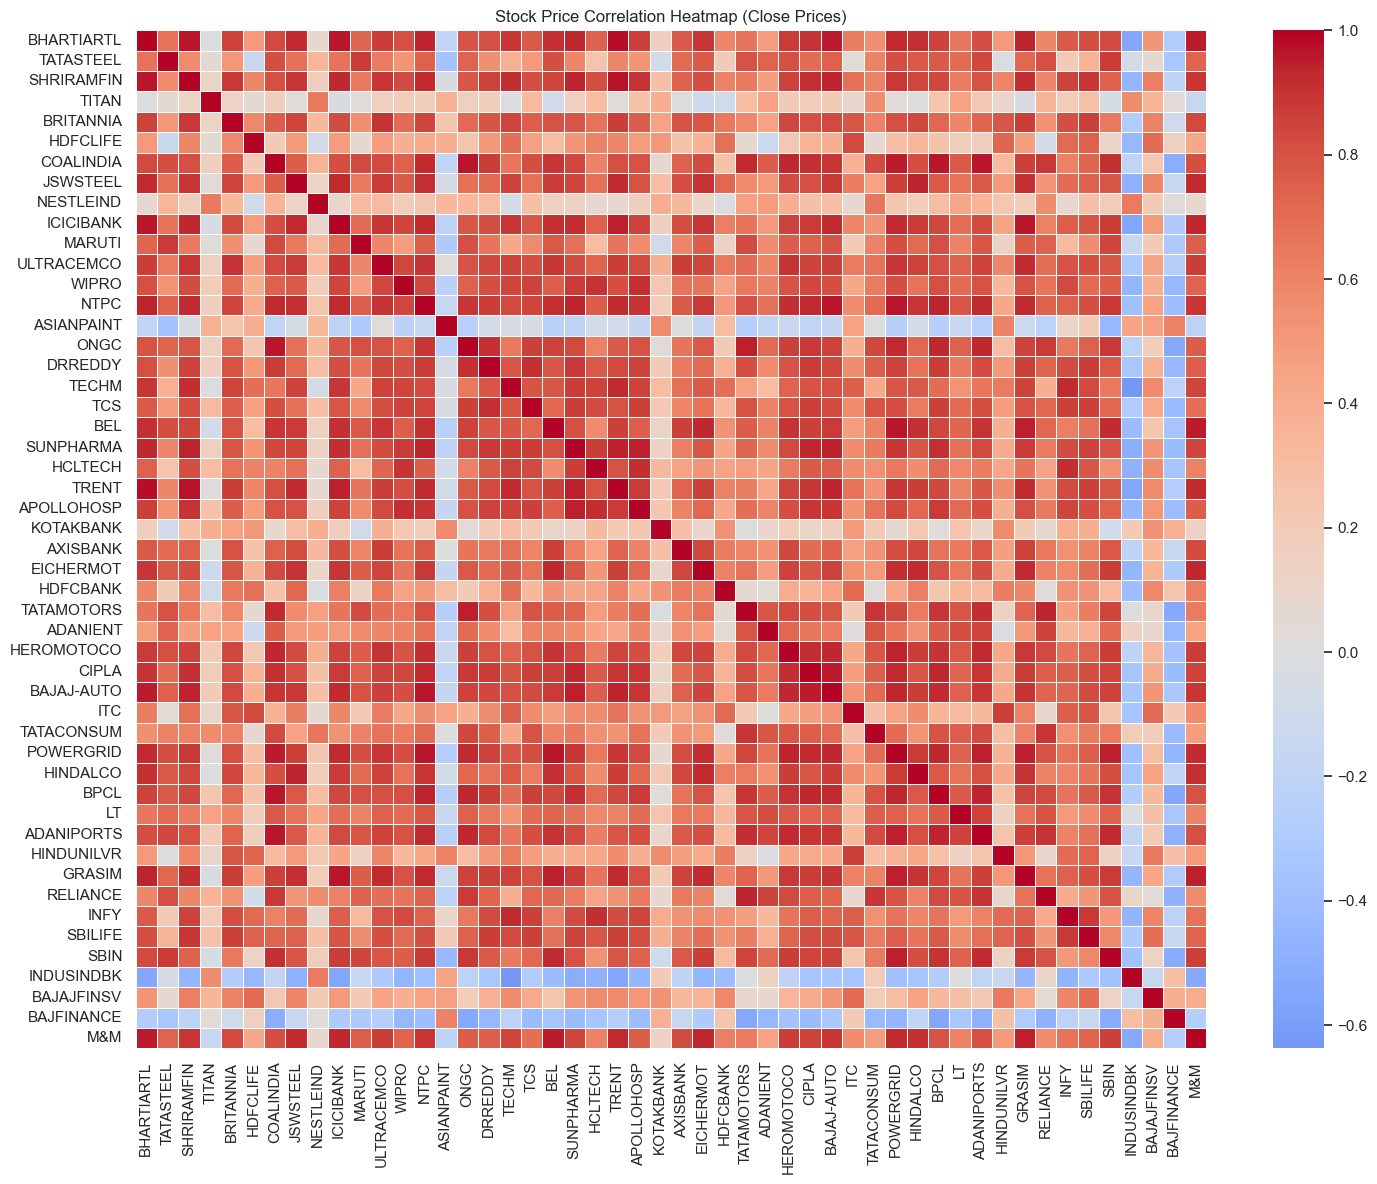

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=False, linewidths=0.5)
plt.title("Stock Price Correlation Heatmap (Close Prices)")
plt.tight_layout()
plt.show()


# 5) 📅 Monthly Gainers & Losers Analysis

In [23]:
import pandas as pd
import os

monthly_returns = []

for file in os.listdir(stock_folder):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(stock_folder, file))
        df['date'] = pd.to_datetime(df['date'])
        df = df.sort_values(by='date')

        ticker = df['Ticker'].iloc[0]
        df['month'] = df['date'].dt.to_period('M')

        for month, group in df.groupby('month'):
            group = group.sort_values(by='date')
            if len(group) < 2:
                continue

            first_close = group['close'].iloc[0]
            last_close = group['close'].iloc[-1]
            monthly_return = (last_close - first_close) / first_close * 100

            monthly_returns.append({
                'Month': str(month),
                'Ticker': ticker,
                'Monthly Return (%)': monthly_return
            })

monthly_df = pd.DataFrame(monthly_returns)


# 📊 Visualization: Gainers & Losers Per Month

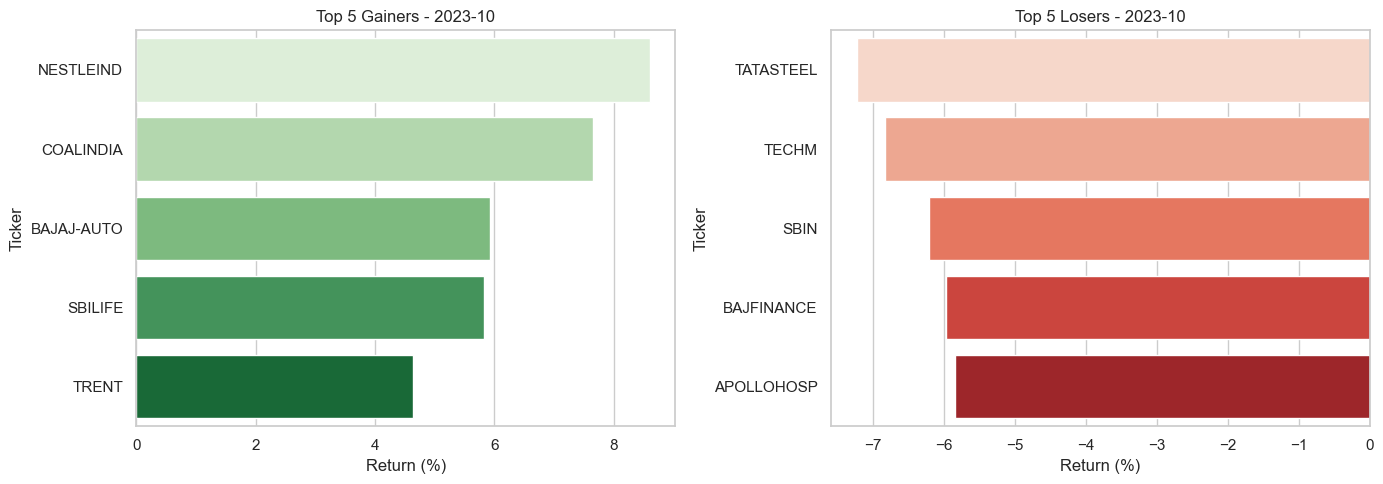

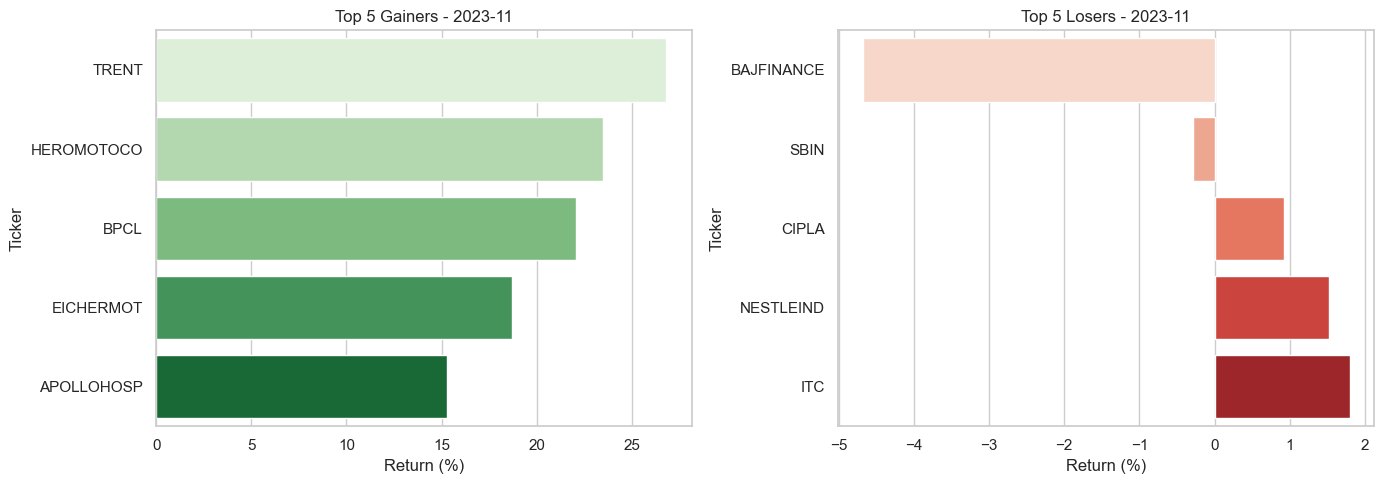

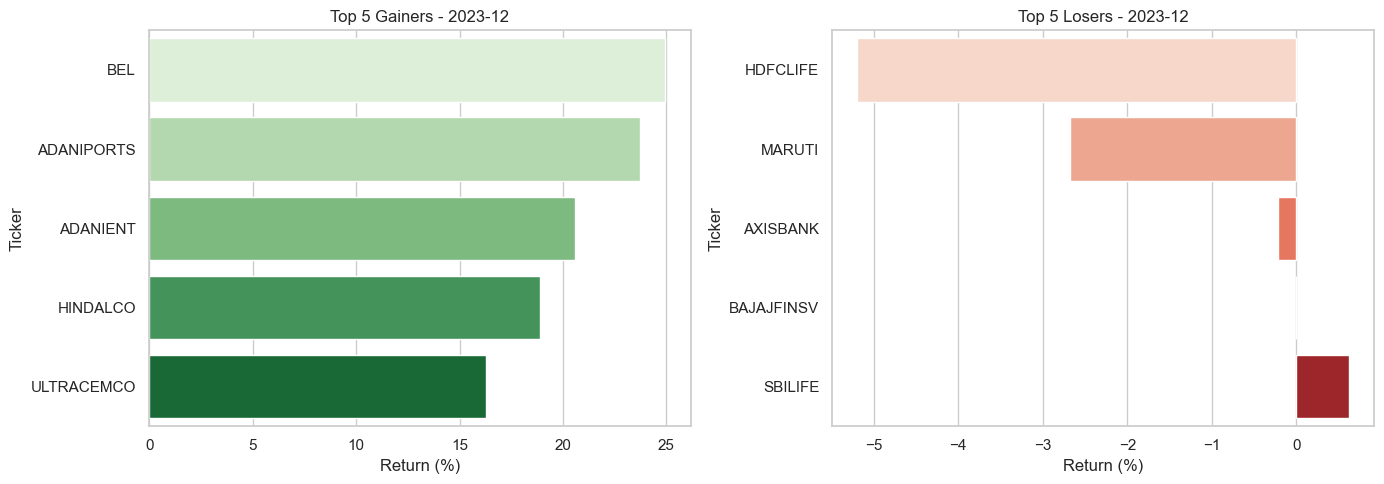

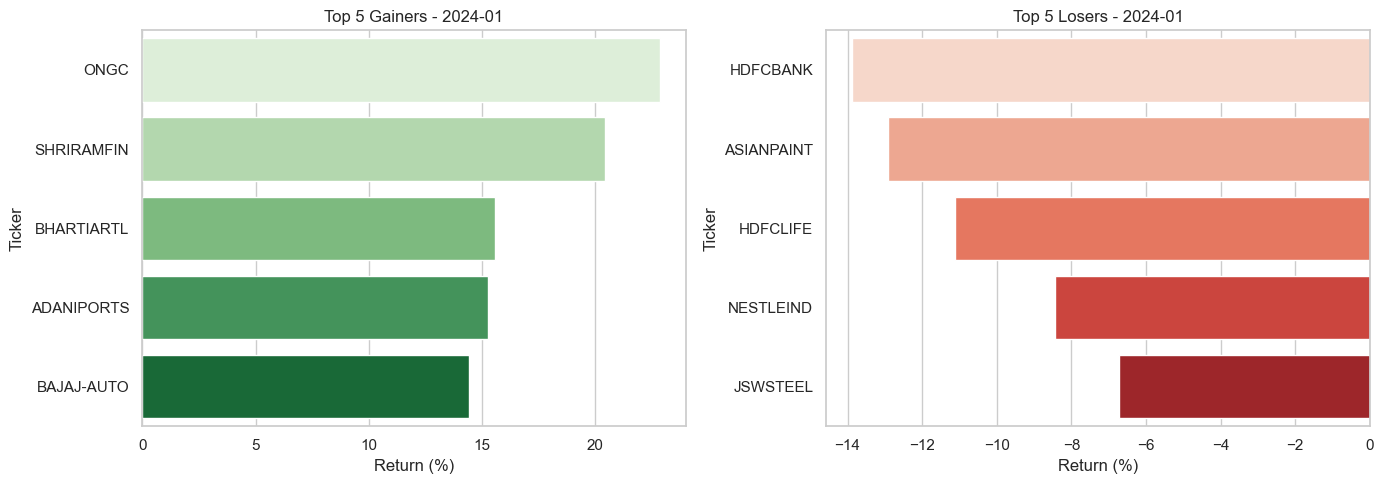

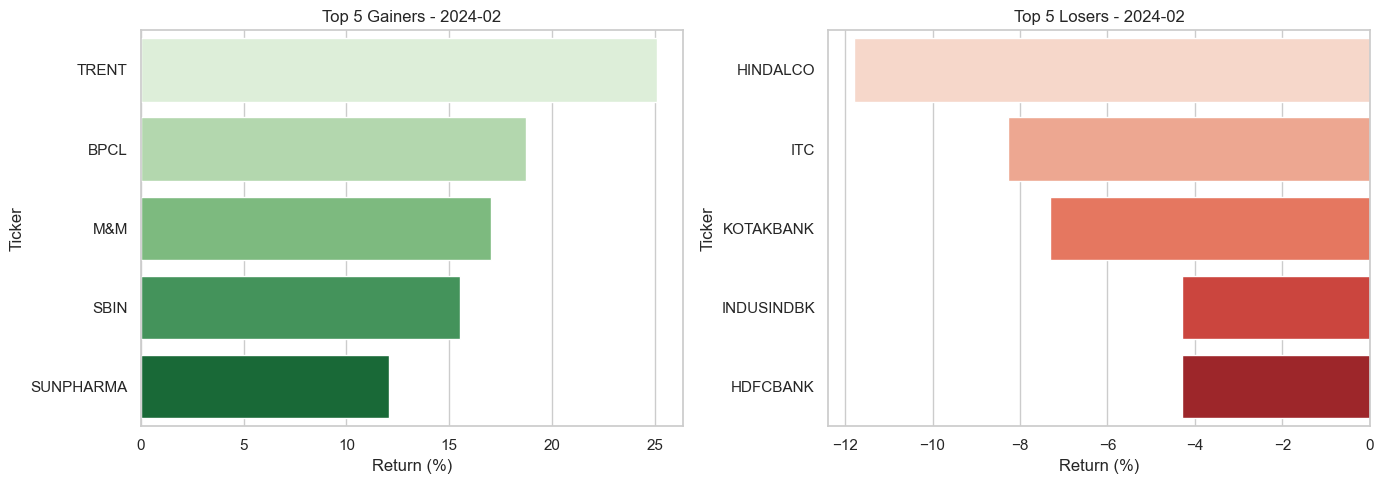

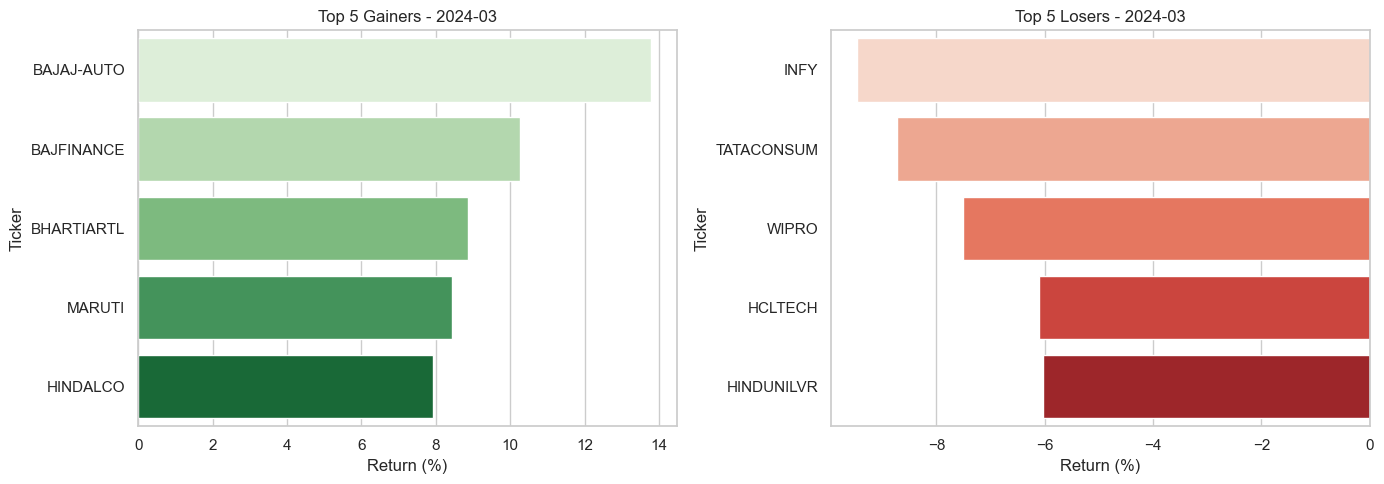

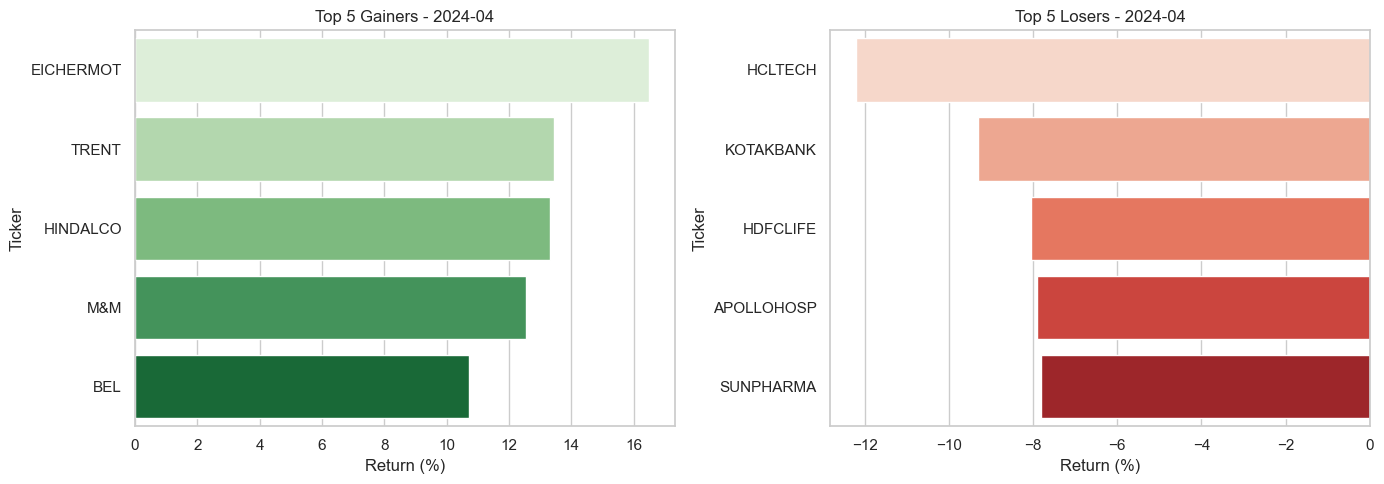

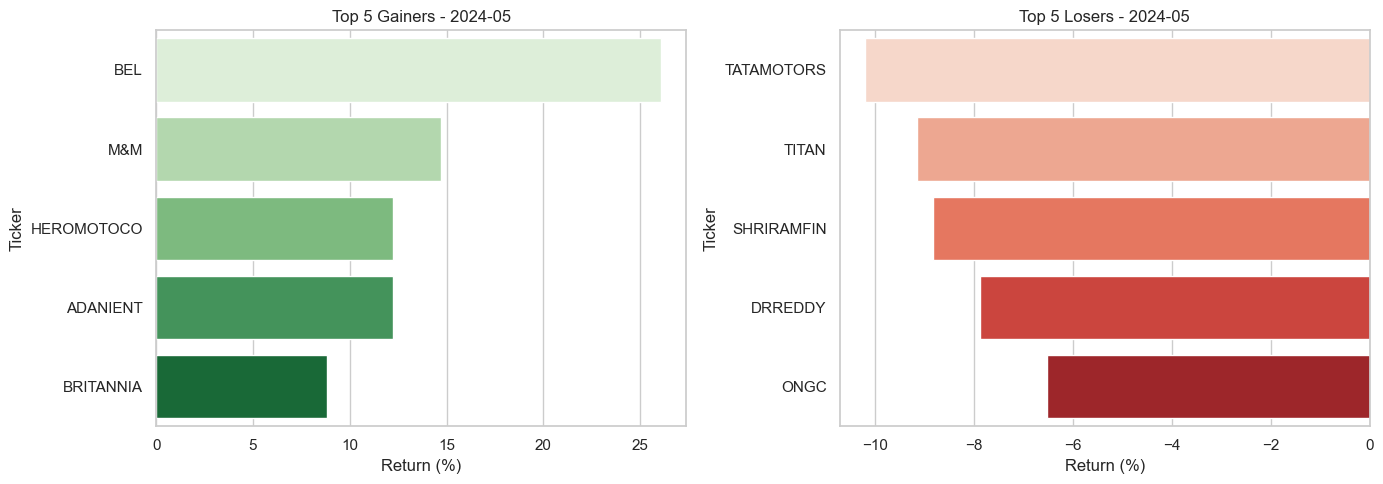

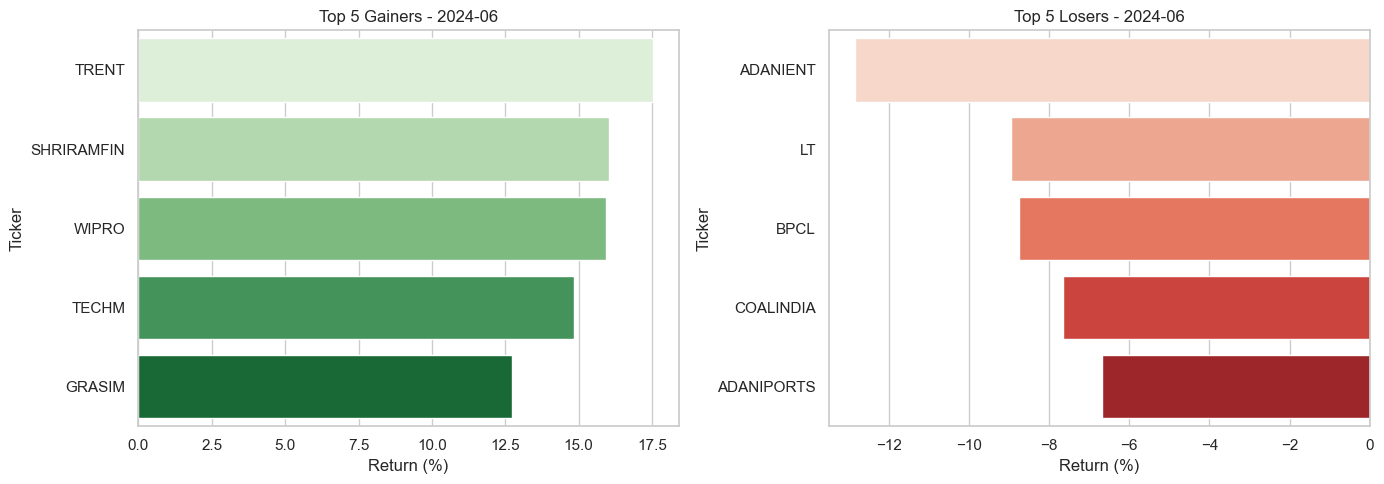

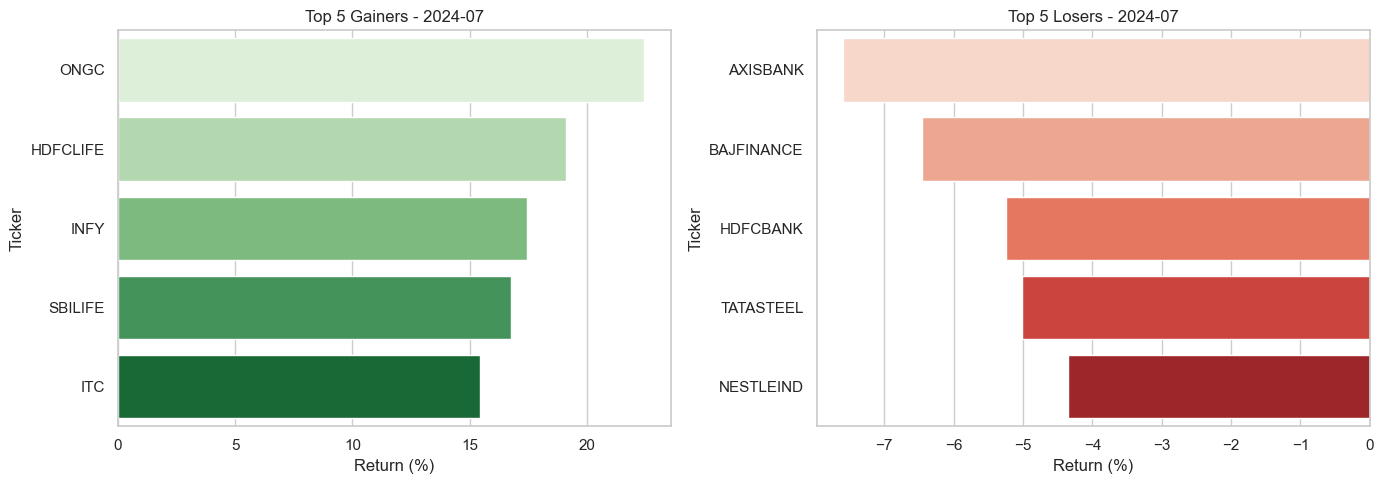

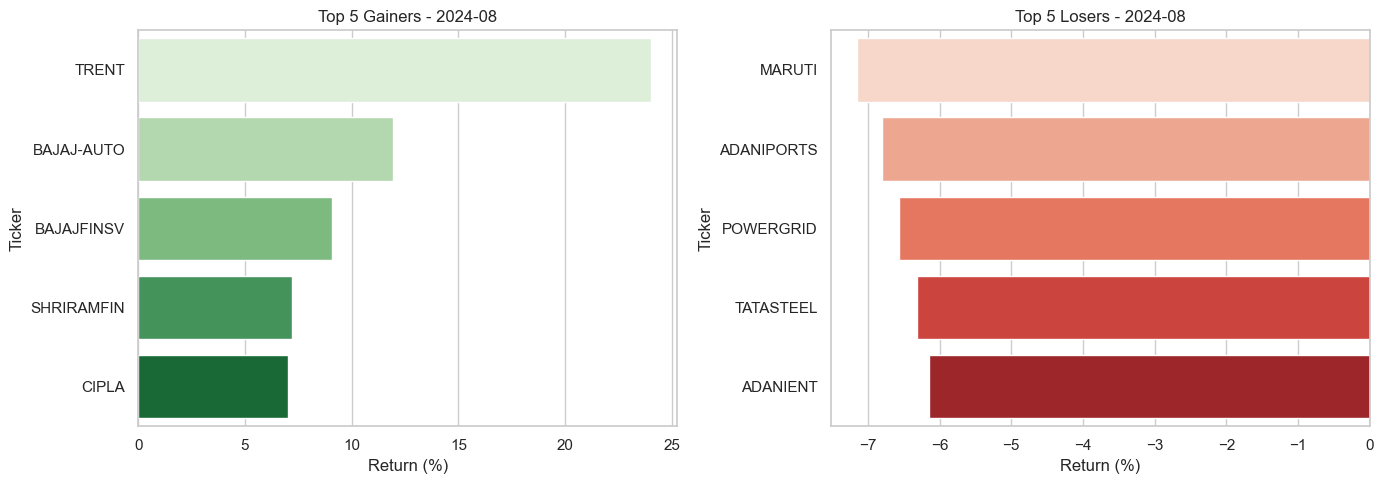

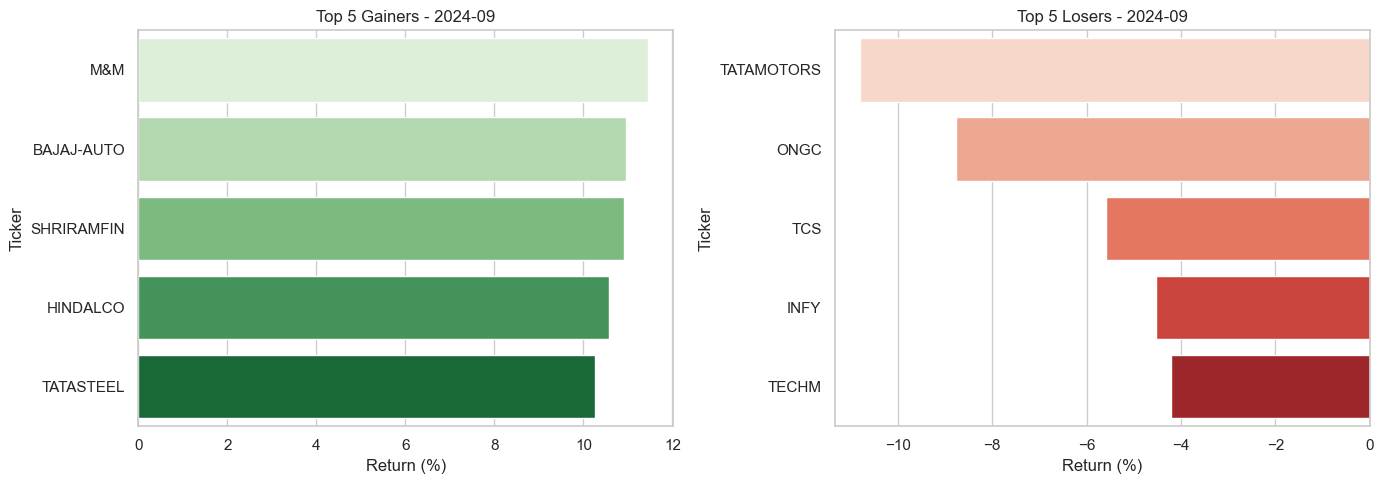

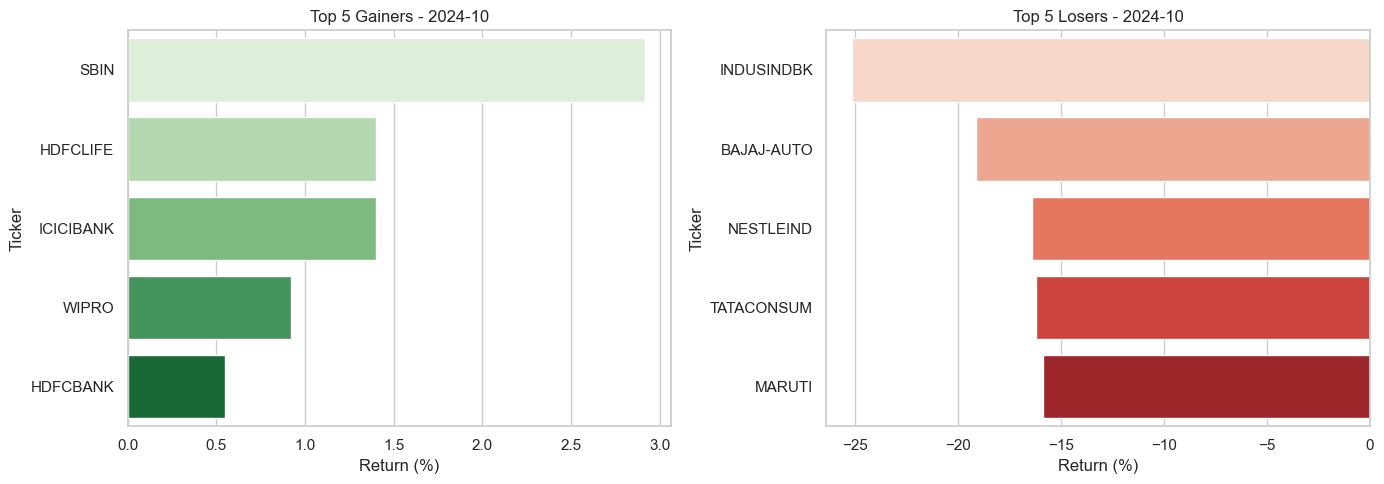

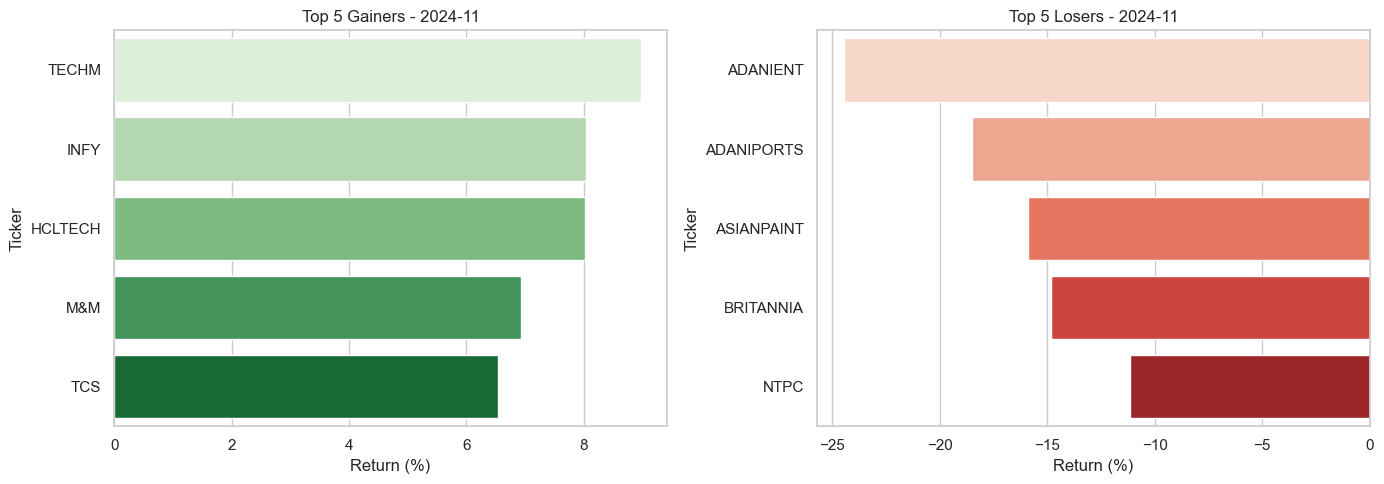

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

unique_months = monthly_df['Month'].unique()

for month in unique_months:
    monthly_data = monthly_df[monthly_df['Month'] == month]

    top_5 = monthly_data.sort_values(by='Monthly Return (%)', ascending=False).head(5)
    bottom_5 = monthly_data.sort_values(by='Monthly Return (%)').head(5)

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    sns.barplot(data=top_5, x='Monthly Return (%)', y='Ticker', palette='Greens', ax=axes[0])
    sns.barplot(data=bottom_5, x='Monthly Return (%)', y='Ticker', palette='Reds', ax=axes[1])

    axes[0].set_title(f"Top 5 Gainers - {month}")
    axes[1].set_title(f"Top 5 Losers - {month}")
    axes[0].set_xlabel("Return (%)")
    axes[1].set_xlabel("Return (%)")

    plt.tight_layout()
    plt.show()
